# **Logistic regression on breast cancer dataset**

**By Philip Blumin and Paul Cucchiara**

# **Dataset Info**

Data set taken from: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

This Breast cancer database was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. The below code is taken from our code for a heartattack dataset and modified to fit this data.

Detailed variable names:

**ID** : sample code number (this column is dropped)

**All of the features have values ranging 1-10**

**CT** : Clump Thickness

**U Cell Size** : Uniformity of Cell Size

**U Cell Shape** : Uniformity of Cell Shape

**MA** : Marginal Adhesion

**SECS** : Single Epithelial Cell Size

**BN** : Bare Nuclei

**BC** : Bland Chromatin

**NN** : Normal Nucleoli

**Mitoses**

**Classes** : What the features are trying to predict. 2 for benign, 4 for malignant


# **Data Preproccessing**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
columns_names = ['ID', 'CT', 'U Cell Size', 'U Cell Shape', 'MA', 'SECS', 'BN', 'BC', 'NN', 'Mitoses', 'Classes']
ds = pd.read_csv('breast-cancer-wisconsin.data', names=columns_names)
ds = ds.drop(columns=['ID', 'BN'], axis=1)
ds.head()

,CT,U Cell Size,U Cell Shape,MA,SECS,BC,NN,Mitoses,Classes
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


**Above are the first few lines of the dataset.**

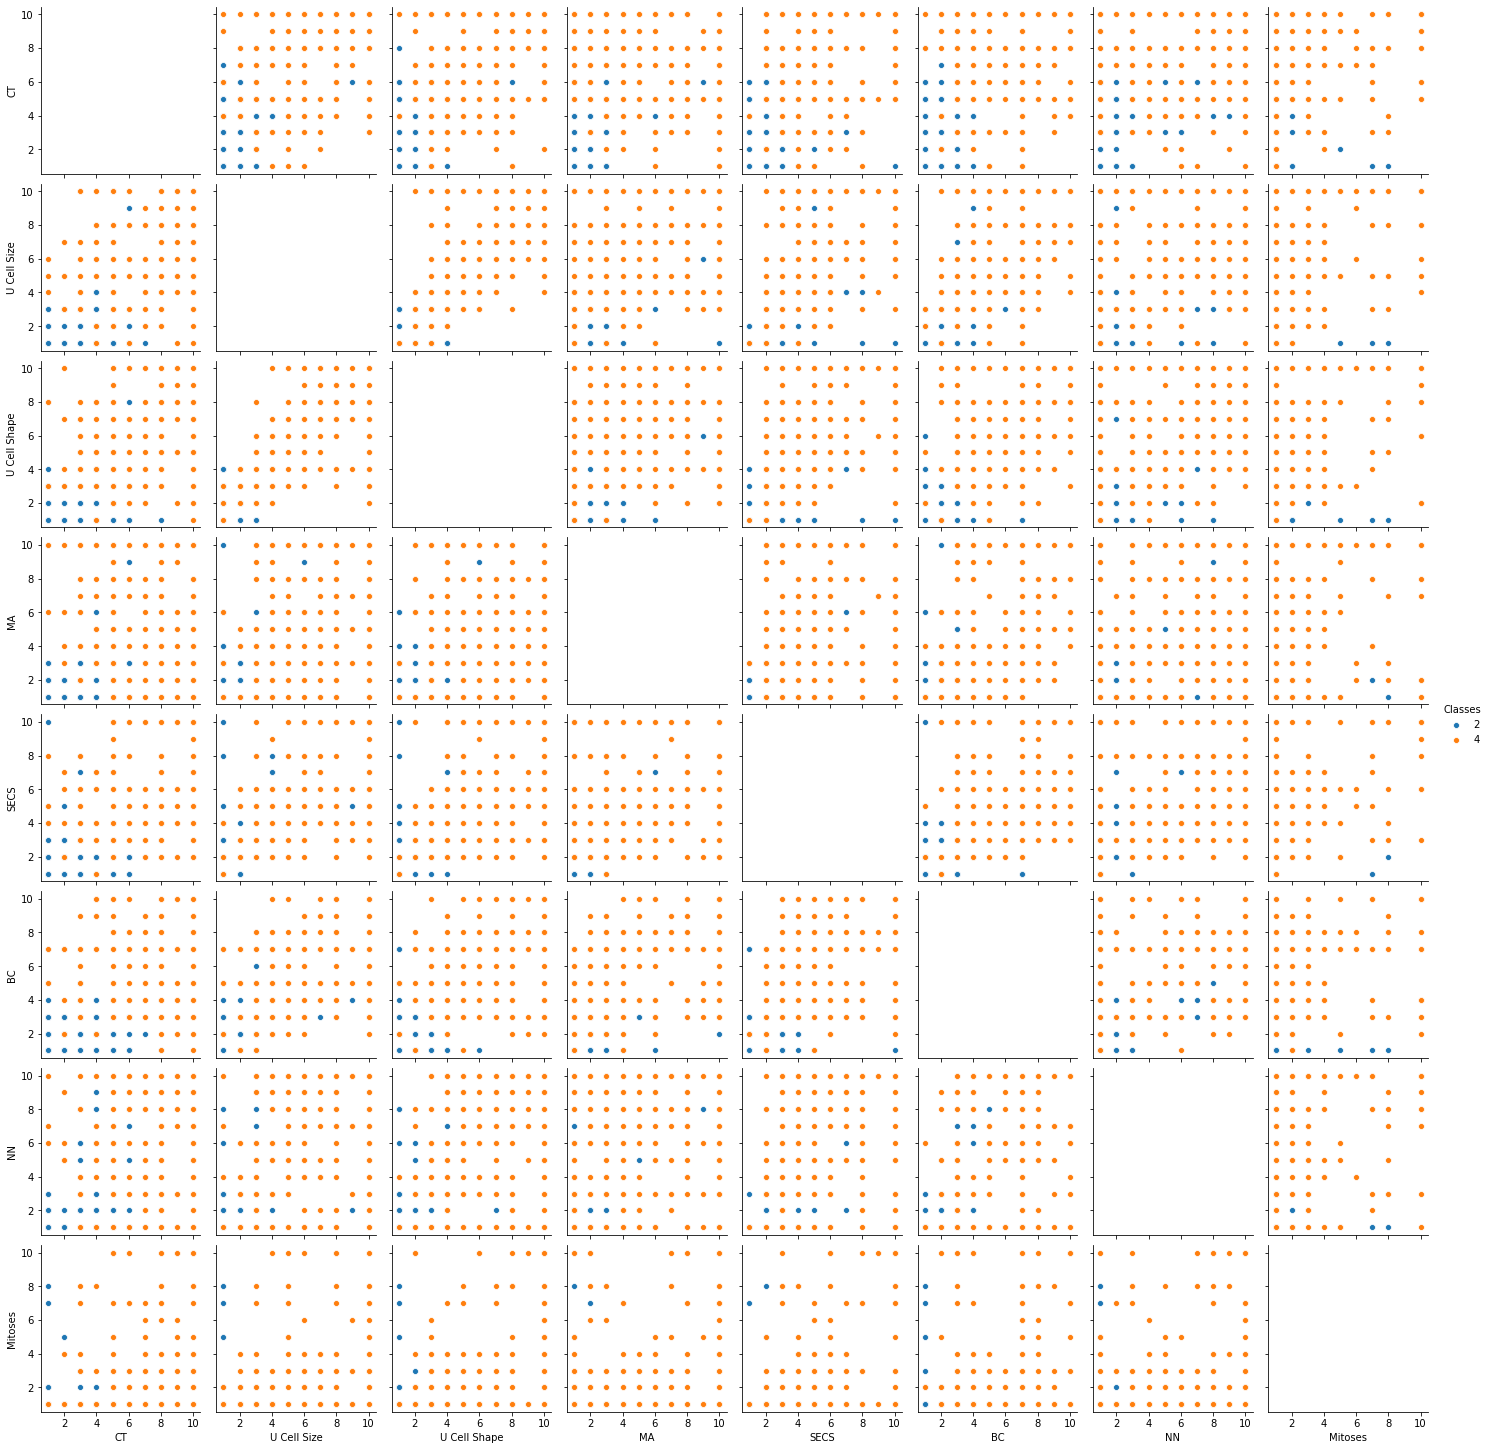

In [ ]:
sns.pairplot(ds, hue="Classes", diag_kind= ['CT', 'U Cell Size', 'U Cell Shape', 'MA', 'SECS', 'BN', 'BC', 'NN', 'Mitoses'])

**Above is a pairplot of all the data. This was created using the seaborn library**

**The features, X, are seperated from what we want to predict (Classes). Notice how the predictions column is binary (either 2 or 4).**

In [ ]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

**The Dataset is split into 80% train, 10% validation, and 10% test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

**The train, test, and validation data is all scaled and a column of 1s is appended to each in order to leave a spot for Theta_0**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.fit_transform(X_val)

In [ ]:
ones = np.ones((1,len(X_train)))
X_train = np.insert(X_train, 0, ones, axis=1)

ones = np.ones((1,len(X_val)))
X_val = np.insert(X_val, 0, ones, axis=1)

ones = np.ones((1,len(X_test)))
X_test = np.insert(X_test, 0, ones, axis=1)

In [ ]:
baseline = np.sum([2 == y_test[i] for i in range(0, len(y_test))])
ascore_baseline = baseline/len(y_test)
print("Accuracy Score of baseline: ", ascore_baseline)
scores = []
scores.append(ascore_baseline);

Accuracy Score of baseline:  0.6571428571428571


**Above is the baseline accuracy score**

# **Unregularized Logistic Regression**


**Below is the training of our Unregularized Logistic Regression Model**

**H is the variable we used for the sigmoid function and it is calculated using the fomrula: h = 1/(1+ exp(-(theta * X_i)))**

**Then this value from the sigmoid function used to calaculate each individual theta using by doing: theta_j = theta_j + (a * (y_i - h) * X_i_j)**

**Here all the thetas are originally set to 0 and the step size, a, is set to 0.01**

In [ ]:
theta = np.zeros(9)
a = 0.01
for j in range(0, len(X_train[0])):
  for i in range(0, len(X_train)):
      for x in range(0, 5):
        h = 1/(1 + np.exp(-np.matmul(np.transpose(theta), X_train[i])))
        theta[j] = theta[j] + (a * (y_train[i] - h) * X_train[i][j]) 

print("Thetas for Unregularized Logistic Regression: ", theta)

Thetas for Unregularized Logistic Regression:  [47.63448695 18.91460906 21.7584858  20.14433586 14.52273908 12.28967621
 12.22947147 10.49696525  6.24637308]


**Above are the thetas calculated by the model. Below, these thetas are  used to predict the test data, by using the sigmoid function. If the sigmoid function produced a value greater than 0.5, the prediction was set to 4 and if it produced a value less than 0.5, the prediction was set to 2.**

In [ ]:
pred = []
for i in range(0, len(X_test)):
  h = 1/(1 + np.exp(-np.matmul(np.transpose(theta), X_test[i])))
  if h > .5:
    h = 4
  else:
    h = 2
  pred.append(h)

pred = np.array(pred)
#print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import accuracy_score
ascore = accuracy_score(y_test, pred)
print("Accuracy Score: ", ascore)
scores.append(ascore);

Accuracy Score:  0.8714285714285714


**Above is the accuracy score on the test data. This accuracy score changes with every run as random points are used in the training calculation. In general, the score is usually around 87%. The accuracy score is much better than the baseline score.**

# **L2 regularized Logistic Regression**

In [ ]:
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)
X_val = np.delete(X_val, 0, axis=1)

**The 1s column created in the previous section and the intersept term is added manually in each of the models to come**

In [ ]:
theta_0 = theta[0]

**Below is the calulation to get the best theta for the L2 regularized logistic regression model**

**The formula and method is similar to the one used in the unregularized calulation, except when getting each theta a penalty term is subracted**

**Penalty: 2 * lambda * theta**

**100 different lambdas where used in the calulation ranging from 0.1 to 10. Since the function loops alot of times, in the calulation for each of the thetas, a random row from the training datasets were used. Using random rows avoids overfitting the data. Each theta was then tested with the validation data and the theta that produced the lowest accuracy score was aquired.**

In [ ]:
best_ac = 0
best_lambda = 0
#beta_theta = np.zeros(9)
theta1 = np.zeros(8)
for l in np.linspace(0.1, 10, 100) :
  for x in range(0, 50):

    #--------Getting Each Theta--------------#

    i = random.randint(len(X_train))
    h1 = 1/(1 + np.exp(-np.matmul(np.transpose(theta1), X_train[i])))
    theta1 = theta1 + (a * (((y_train[i] - h1) * X_train[i])  - 2*l*theta1))

    #--------Predicting validation data using each Theta--------------#

    pred2 = [];
    for i in range(0, len(X_val)):
      h1 = 1/(1 + np.exp(-(np.matmul(np.transpose(theta1), X_val[i]))))
      if h1 > .5:
        h1 = 4
      else:
        h1 = 2
      pred2.append(h1)
    pred2 = np.array(pred2)
    ascore2 = accuracy_score(y_val, pred2)

    #--------Getting best accuracy score--------------#

    if ascore2 > best_ac:
      best_ac = ascore2
      best_lambda = l
      best_theta = theta1

#print(best_ac)
print("Best Lambda: ", best_lambda)
print("Best Thetas for L2 regularized: ", best_theta)

Best Lambda:  2.9000000000000004
Best Thetas for L2 regularized:  [ 0.06742081  0.11130362  0.13672834  0.06678142 -0.0090963   0.04307388
  0.0963158   0.04154293]


**Above the best lambda and thetas from the L2 regularized calculation are displayed. These thetas are used to predict the test data the same was they were used in the unregularized regression model**

In [ ]:
pred3 = [];
for i in range(0, len(X_test)):
  h2 = 1/(1 + np.exp(-(np.matmul(np.transpose(best_theta), X_test[i]))))
  if h2 > .5:
    h2 = 4
  else:
    h2 = 2 
  pred3.append(h2)
pred3 = np.array(pred3)
ascore3 = accuracy_score(y_test, pred3)
scores.append(ascore3);
print("Accuracy Score: ", ascore3)

Accuracy Score:  0.9714285714285714


**Above is the L2 accuracy score on the test data. This accuracy score changes with every run as random points are used in the training calculation. In general the accuracy score ranges between 93 and 97%. On average this accuracy score is about 10% higher than the unregularized model. *The* accuracy score is much better than the baseline score.**

# **Stepwise Logistic Regression**

**Below is a function that preforms the calulation using the stepwise method for logistic regression. This calculation is similar to the one used the L2 regularized, but instead of using thetas for each feature at the same time, individual thetas are calculated and the best thetas for each feature are used.**

In [ ]:
def stepwise(n):
  best_ac_1 = 0
  best_lambda_1 = 0
  zeros = np.zeros(8)
  zeros[n] = 1
  theta_1 = np.zeros(8)
  for l in np.linspace(0.1, 10, 100) :
    for x in range(0, 50):

      #--------Getting Each Theta--------------#

      i = random.randint(len(X_train))
      h_1 = 1/(1 + np.exp(-np.matmul(np.transpose(theta_1), X_train[i])))
      theta_1 = theta_1 + (a * ((y_train[i] - h_1) * X_train[i]))
      theta_1 = theta_1 * zeros
      #theta_1[1:] = theta_1[1:] * 0;
      #print(theta_1)

    #--------Predicting validation data using each Theta--------------#

      pred4 = [];
      for i in range(0, len(X_val)):
        h_1 = 1/(1 + np.exp(-(np.matmul(np.transpose(theta_1), X_val[i]))))
        if h_1 > .5:
          h_1 = 4
        else:
          h_1 = 2
        pred4.append(h_1)
      pred4 = np.array(pred4)
      ascore4 = accuracy_score(y_val, pred4)

      #--------Getting best accuracy score--------------#
      
      if ascore4 > best_ac_1:
        best_ac_1 = ascore4
        best_lambda_1 = l
        best_theta_1 = theta_1[n]

  return best_theta_1

**The function above is preformed 8 times, once for each of the features. The best thetas from each are appended to theta_stepwise array, which contains the best thetas.**

In [ ]:
thetas_stepwise = []
for i in range(0, 8):
    thetas_stepwise.append(stepwise(i))

print("Stepwise Thetas: ", thetas_stepwise)

Stepwise Thetas:  [0.029575724530878506, 0.0036177190143695938, 0.04437201053745121, 0.06380752298465205, 0.012679099003472319, 0.008446875725273093, 0.058278970072659524, 0.035709929179042595]


**Above the stepwise thetas for this run are shown. The 3 highest thetas for every run are selected to use for the training sets. The other thetas are dropped as well as their corresponding features**


In [ ]:
#Import features: Theta[0,1,8]
thetas_stepwise_updated = [thetas_stepwise[0], thetas_stepwise[1],thetas_stepwise[6]]
X_test_updated = np.delete(X_test, [2,3,4,5,7], axis=1)

**The top 3 features selected by the stepwise method are: *Clump Thickness, Uniformity of Cell Size, and Bland Chromatin.* Since we are not to fimilar in the field of breast cancer we can not tell for sure if the selected features make sense. From our research Clump Thickness makes sense as a selected feature**

In [ ]:
pred5 = [];
for i in range(0, len(X_test_updated)):
  h3 = 1/(1 + np.exp(-(np.matmul(np.transpose(thetas_stepwise_updated), X_test_updated[i]))))
  if h3 > .5:
    h3 = 4
  else:
    h3 = 2 
  pred5.append(h3)
pred5 = np.array(pred5)
ascore5 = accuracy_score(y_test, pred5)
scores.append(ascore5);
print("Accuracy Score: ", ascore5)

Accuracy Score:  0.9571428571428572


**Above is the stepwise accuracy score on the test data. Just like the L2 regularized model this accuracy score changes with every run as random points are used in the training calculation. In general, the accuracy score ranges between 93 and 95%. On average this accuracy score is similar to the accuracy score of the L2 regularized and much better than the unregularized models. The accuracy score is much better than the baseline score.**

# **Stretch Goal #1 (L1 Penalty)**

**Below is the calulation to get the best thetas for the L1 regularized logistic regression model**

**The formula and method is similar to the one used in the L2 regularized calulation, except when getting each theta a different penalty term is subracted**

**Penalty: l/len((x_train) * np.sum(sign(theta2))**

In [ ]:
best_ac_2 = 0
best_lambda_2 = 0
#beta_theta = np.zeros(9)
theta2 = np.zeros(8)
lambda_list = []
theta_list = []
for l in np.linspace(0.1, 1, 50) :
  lambda_list.append(l)
  for x in range(0, 100):
    
    #--------Getting Each Theta--------------#

    i = random.randint(len(X_train))
    h4 = 1/(1 + np.exp(-np.matmul(np.transpose(theta2), X_train[i])))
    theta2 = theta2 + (a * ((y_train[i] - h4) * X_train[i]  - l/len(X_train) * np.sign(np.sum(theta2))))
    
    #--------Predicting validation data using each Theta--------------#

    pred6 = [];
    for i in range(0, len(X_val)):
      h4 = 1/(1 + np.exp(-(np.matmul(np.transpose(theta2), X_val[i]))))
      if h4 > .5:
        h4 = 4
      else:
        h4 = 2
      pred6.append(h4)
    pred6 = np.array(pred6)
    ascore6 = accuracy_score(y_val, pred6)

    #--------Getting best accuracy score--------------#

    if ascore6 > best_ac_2:
      best_ac_2 = ascore6
      best_lambda_2 = l
      best_theta_2 = theta2
  theta_list.append(theta2)

#print(best_ac_2)
print("Best Lambda: ", best_lambda_2)
print("Best Thetas for L1 regularized: ", best_theta_2)

Best Lambda:  0.1
Best Thetas for L1 regularized:  [ 0.07923865  0.0830753   0.06567023  0.0392839   0.04318714 -0.01358673
  0.13954786 -0.04927597]


In [ ]:
pred7 = [];
for i in range(0, len(X_test)):
  h5 = 1/(1 + np.exp(-(np.matmul(np.transpose(best_theta_2), X_test[i]))))
  if h5 > .5:
    h5 = 4
  else:
    h5 = 2 
  pred7.append(h5)
pred7 = np.array(pred7)
ascore7 = accuracy_score(y_test, pred7)
scores.append(ascore7);
print("Accuracy Score: ", ascore7)

Accuracy Score:  0.9428571428571428


**Above is the L1 accuracy score on the test data. Just like the L2 regularized model this accuracy score changes with every run as random points are used in the training calculation. In general, the accuracy score ranges between 95 and 98%. On average this accuracy score is slightly worse than the accuracy score of the other methods used. The accuracy score is much better than the unregularized and baseline score.**

In [ ]:
from sklearn.linear_model import lasso_path
eps = 5e-3
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps)
neg_log_alphas_lasso = -np.log10(alphas_lasso)

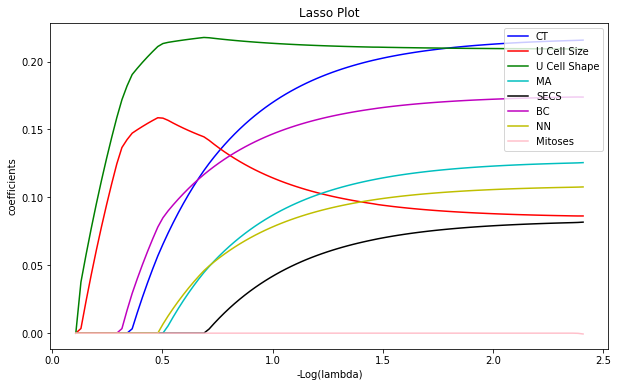

In [ ]:
from itertools import cycle
lab = ['CT', 'U Cell Size', 'U Cell Shape', 'MA', 'SECS', 'BC', 'NN', 'Mitoses']
plt.figure(figsize=(10,6))
colors = cycle(['b', 'r', 'g', 'c', 'k', 'm', 'y', 'pink'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
  l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c, label=lab)
plt.xlabel('-Log(lambda)')
plt.ylabel('coefficients')
plt.title('Lasso Plot')
plt.axis('tight')
plt.legend(lab,loc=1,prop={'size': 10})
#plt.axvline(x=(-np.log10(best_lambda)), color = 'red', linestyle='--')
plt.show()

**Above is the lasso plot. The lasso plot selects club, uniformity of cell shape, MA, and BC. These are are similar to the features selected by the stepwise method.**

In [ ]:
methods = ['Baseline','unregularized', 'L2 Penalty', 'Stepwise', 'L1 Penalty']
data = {'Method' : methods,
      'Accuracy Score' : scores}
df2 = pd.DataFrame(data, columns=['Method', 'Accuracy Score'])
df2

,Method,Accuracy Score
0,Baseline,0.657143
1,unregularized,0.871429
2,L2 Penalty,0.971429
3,Stepwise,0.957143
4,L1 Penalty,0.942857


**Overall, the acurracy score for all 3 types of penalities was very high and always much better than the baseline and unregularized accuracy scores. This shows that using a logistic model is very good on this dataset. All the penality accuracy scores where very similar but on average the L2 penality had a slightly better accuracy score, so the best method to use on this data set would probably be Logistic regression was a L2 penalty**

**Additionally, in a third file the multiclass method is preformed on a new dataset.**